The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/mohamed/ML_course/projects/project1/ml-project-1-bkm
0.33981565001722497


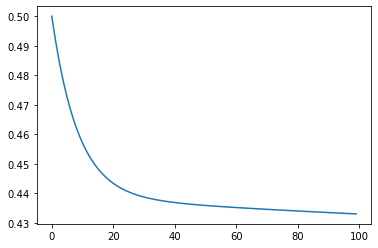

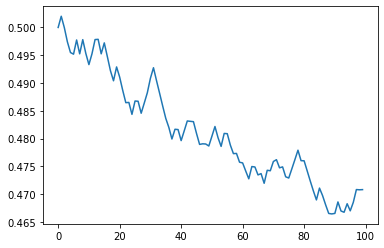

0.339818714087617


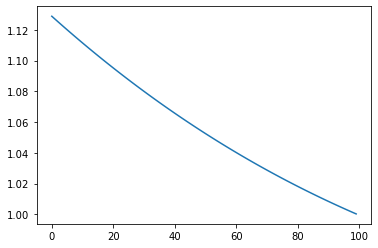

[[ 1.27836373e-05]
 [-4.96301557e-06]
 [-6.32146271e-06]
 [-3.41558025e-06]
 [ 5.95943895e-05]
 [ 5.66596509e-05]
 [ 5.96051367e-05]
 [-1.81661640e-07]
 [-1.50450825e-06]
 [-1.07730571e-05]
 [-1.26761172e-07]
 [ 3.92590572e-08]
 [ 5.96159791e-05]
 [-2.50014071e-06]
 [ 9.97156505e-10]
 [-5.69079801e-11]
 [-3.68007864e-06]
 [ 1.86249449e-09]
 [-3.17428640e-09]
 [-3.18691714e-06]
 [ 1.97651927e-09]
 [-1.47918037e-05]
 [-6.58646063e-08]
 [ 3.37094041e-05]
 [ 3.67713956e-05]
 [ 3.67710830e-05]
 [ 5.85894482e-05]
 [ 5.96207673e-05]
 [ 5.96203812e-05]
 [-4.59283757e-06]]


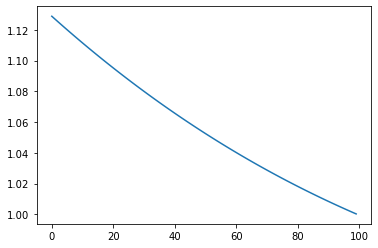

[[ 1.27836373e-05]
 [-4.96301557e-06]
 [-6.32146271e-06]
 [-3.41558025e-06]
 [ 5.95943895e-05]
 [ 5.66596509e-05]
 [ 5.96051367e-05]
 [-1.81661640e-07]
 [-1.50450825e-06]
 [-1.07730571e-05]
 [-1.26761172e-07]
 [ 3.92590572e-08]
 [ 5.96159791e-05]
 [-2.50014071e-06]
 [ 9.97156505e-10]
 [-5.69079801e-11]
 [-3.68007864e-06]
 [ 1.86249449e-09]
 [-3.17428640e-09]
 [-3.18691714e-06]
 [ 1.97651927e-09]
 [-1.47918037e-05]
 [-6.58646063e-08]
 [ 3.37094041e-05]
 [ 3.67713956e-05]
 [ 3.67710830e-05]
 [ 5.85894482e-05]
 [ 5.96207673e-05]
 [ 5.96203812e-05]
 [-4.59283757e-06]]
0.7196227298571859
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
%matplotlib inline
import numpy as np
from proj1_helpers import *
from data_cleanup import *
from implementationsmed import *

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [65]:
! ls

bkm			   implementationsmed.py     project1.ipynb
data			   implementations.py	     __pycache__
data_cleanup.py		   playground.ipynb	     README.md
feature_engineering.ipynb  proj1_helpers.py	     Untitled1.ipynb
implementationsmed.ipynb   project1_description.pdf  Untitled.ipynb


In [66]:
DATA_TRAIN_PATH='./data/train.csv' 


Y1, X1, ids= load_csv_data(DATA_TRAIN_PATH)

Y1=Y1.reshape((Y1.shape[0],1))

In [128]:
X1

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [68]:
_corr = np.corrcoef(X1, rowvar=False)
corr=_corr*np.triu(np.ones(_corr.shape),k=1)


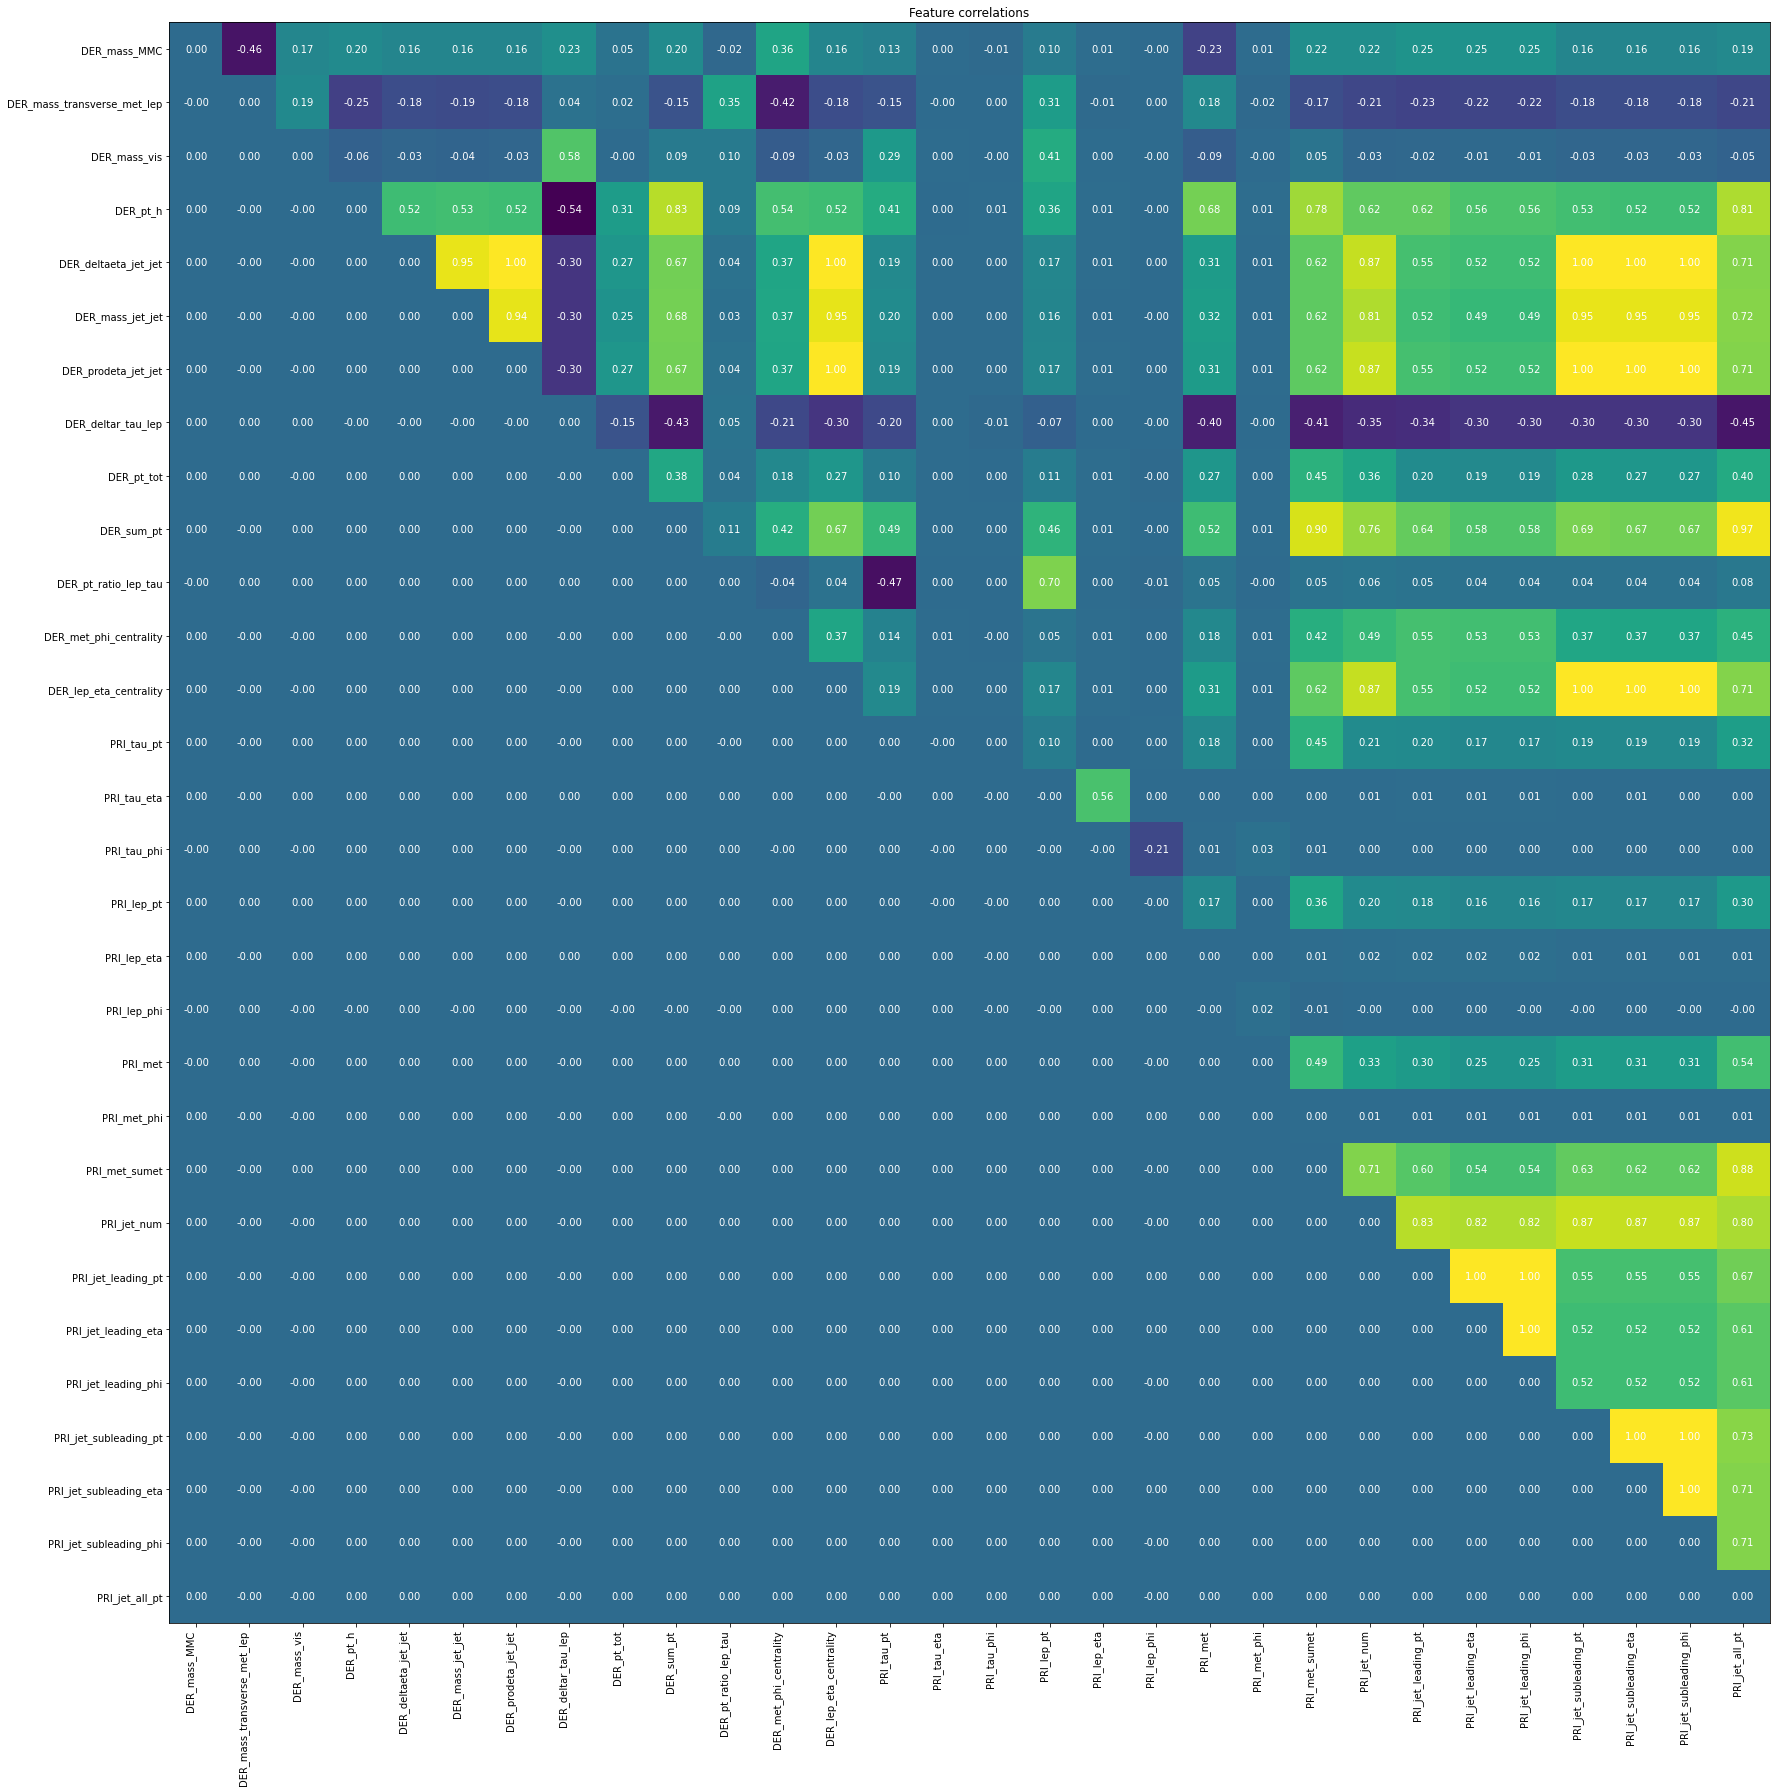

In [69]:
plot_correlation_heatmap(X1)

In [70]:
[4:5,4:6,4:28,4:27,4:26,4:12,5:6,5:12,5:26,5:27,5:28,6:12,6:26,2:27,6:28,9:29,12:26,12:27,12:28,26:27,26:28,27,28,23:24,23:25,24:25]

SyntaxError: invalid syntax (<ipython-input-70-8103d16bb799>, line 1)

In [ ]:
to_drop = [column for column in range(30) if any(corr[column] > 0.95)]
print(); print(to_drop)

In [ ]:
new_X=np.delete(X1,to_drop,axis=1)

In [ ]:
new_X.shape

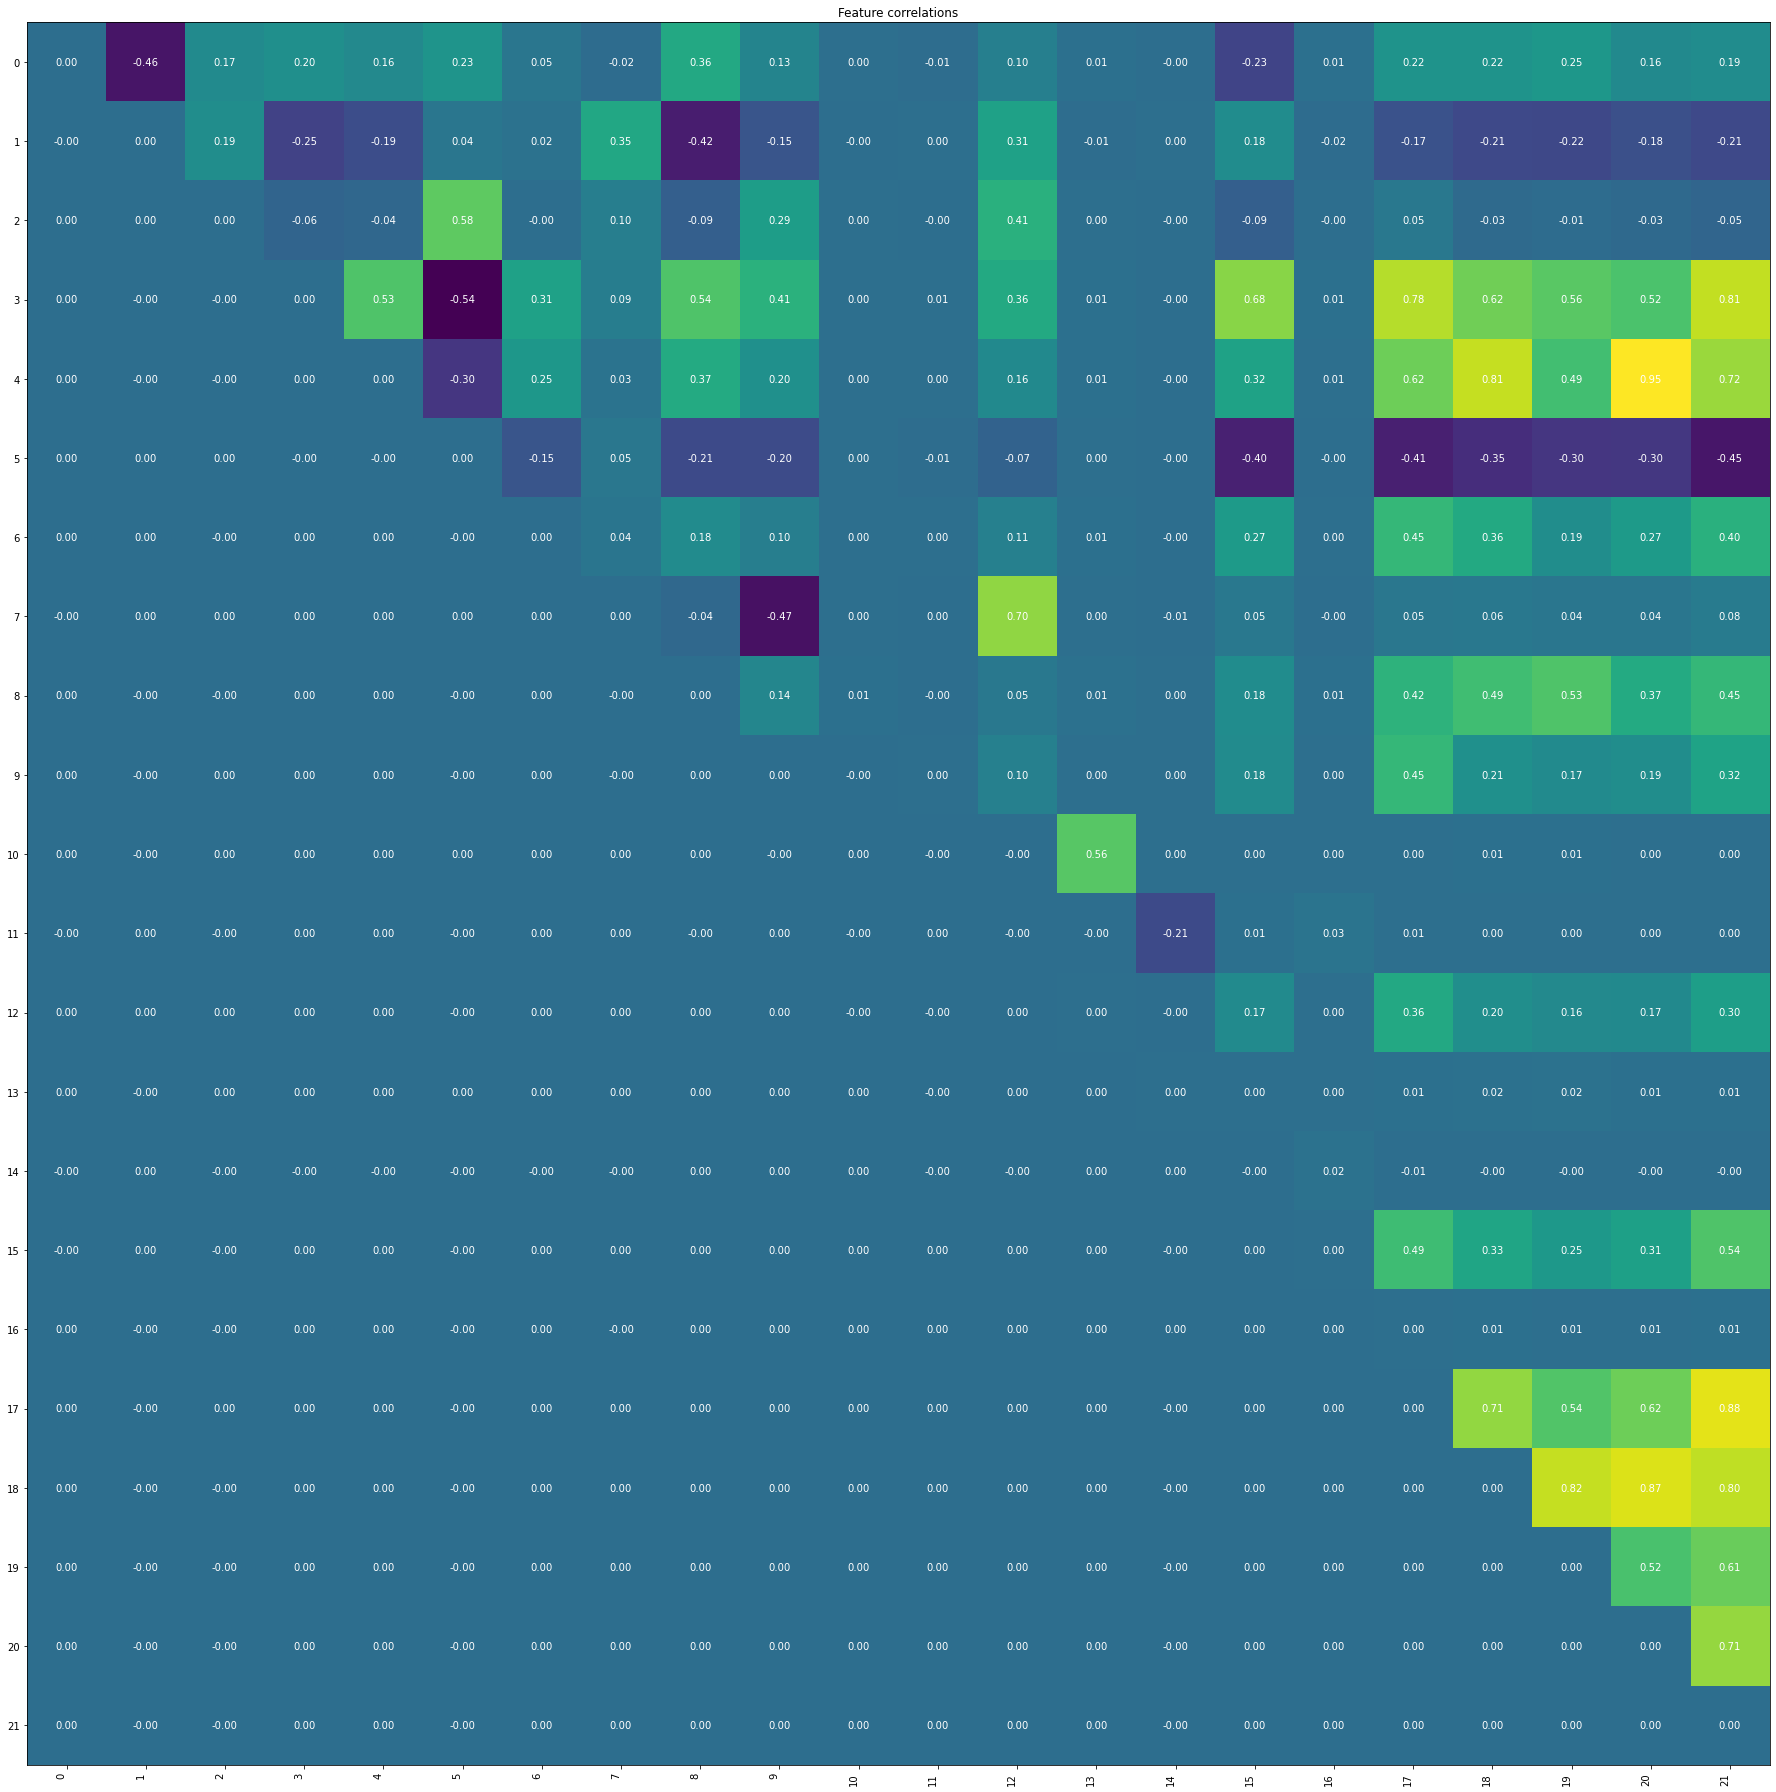

In [71]:
_corr = np.corrcoef(new_X, rowvar=False)
corr=_corr*np.triu(np.ones(_corr.shape),k=1)

fig, ax = plt.subplots(figsize=(25,25))
im = ax.imshow(corr,  cmap='viridis')
ax.set_xticks(np.arange(new_X.shape[1]))
ax.set_yticks(np.arange(new_X.shape[1]))
    #ax.set_xticklabels(features)
    #ax.set_yticklabels(features)


plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

for i in range(22):
    for j in range(22):
        text = ax.text(j, i, "{:.2f}".format(corr[i, j]),ha="center", va="center", color="w")

ax.set_title("Feature correlations")
fig.tight_layout()
plt.show()

In [82]:
initial_w = np.zeros((30,1))
w, loss = logistic_regression(Y1, X1, initial_w, 100, 0.000000001)


In [83]:
print(loss[-1])

1.0008845278120488


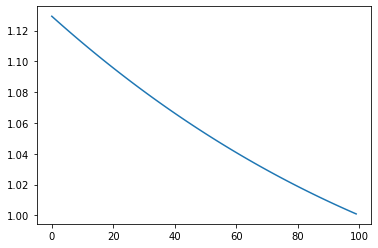

In [84]:
plt.plot(loss)

In [428]:
def imput_data(X):
    me=np.max(X,axis=0)
    maxes=np.broadcast_to(me,X.shape)
    res=np.where(X==-999,maxes,X)
    return res

In [427]:
max=np.max(X,axis=0)
max=np.broadcast_to(mean,X.shape)
max

array([[1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ],
       [1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ],
       [1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ],
       ...,
       [1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ],
       [1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ],
       [1192.026,  690.075, 1349.351, ...,    3.142, 1633.433,   11.   ]])

In [429]:
X_imputed=imput_data(X1)

In [432]:
initial_w = np.zeros((30,1))
w, loss = logistic_regression(Y1, X_imputed, initial_w, 1000, 0.0000000001)

0.9068855349223919


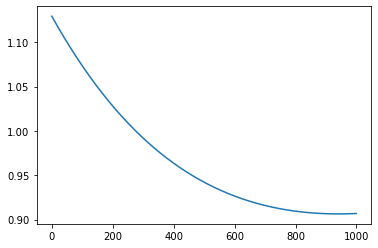

In [433]:
plt.plot(loss)
print(loss[-1])

In [462]:
X_normalized,means,stds=feature_normalization(X1)

In [497]:
initial_w = np.zeros((30,1))
w, loss = logistic_regression(Y1, X1, initial_w, 100, 0.000000001)

1.0008845278120488


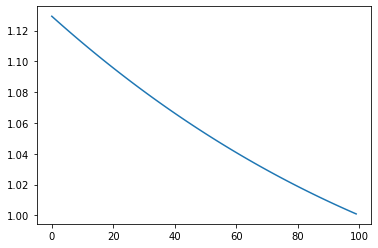

In [498]:
plt.plot(loss)
print(loss[-1])

In [136]:
count=np.zeros(X1.shape[0])
for i in range(X1.shape[0]):
    count[i]=len([1 for j in X1[i,:] if j==-999])

X=np.c_[X1,count]

(array([72543.,     0.,     0.,     0.,     0.,     0., 69982.,  7562.,
            0., 99913.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

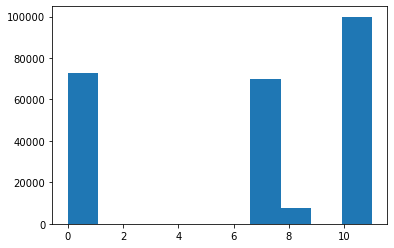

In [142]:
plt.hist(count)

In [91]:
def feature_normalization(X):
    means=np.mean(X,axis=0).reshape((X.shape[1],1))
    stds=np.std(X,axis=0).reshape((X.shape[1],1))
    
    return (X-means.T)/stds.T, means, stds


In [174]:
print(set(count))

{0.0, 1.0, 7.0, 8.0, 10.0, 11.0}


In [175]:
X_a=X[np.asarray(X[:,-1]==0|(X[:,-1]==1))]
Y_a=Y1[np.asarray(X[:,-1]==0|(X[:,-1]==1))]
X_b=X[np.asarray((X[:,-1]==7)|(X[:,-1]==8))]
Y_b=Y1[np.asarray((X[:,-1]==7)|(X[:,-1]==8))]
X_c=X[np.asarray((X[:,-1]==10)|(X[:,-1]==11))]
Y_c=Y1[np.asarray((X[:,-1]==10)|(X[:,-1]==11))]

In [317]:
L_a=[i for i in range(X1.shape[1]) if X_a[1,i]==-999]+[30]
L_b=[i for i in range(X1.shape[1]) if X_b[0,i]==-999]+[30]
L_c=[i for i in range(X1.shape[1]) if X_c[1,i]==-999]+[30]


In [318]:
X_a_clean=np.delete(X_a,L_a,1)
X_b_clean=np.delete(X_b,L_b,1)
X_c_clean=np.delete(X_c,L_c,1)

In [319]:
Y_c.shape[0]+Y_b.shape[0]+Y_a.shape[0]

250000

In [368]:
X_c.shape[0]+X_b.shape[0]+X_a.shape[0]

250000

In [340]:
initial_w = np.zeros((X_a_clean.shape[1],1))
w_a, loss_a = logistic_regression(Y_a, X_a_clean, initial_w, 1700, 0.00000001)


0.43369590611811915


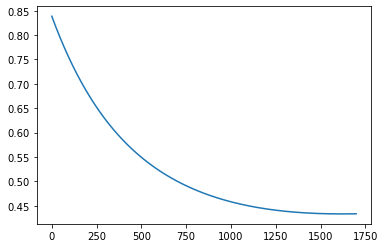

In [341]:
plt.plot(loss_a)
print(loss_a[-1])

In [335]:
initial_w = np.zeros((X_b_clean.shape[1],1))
w_b, loss_b = logistic_regression(Y_b, X_b_clean, initial_w, 2800, 0.00000001)


0.7922636898515121


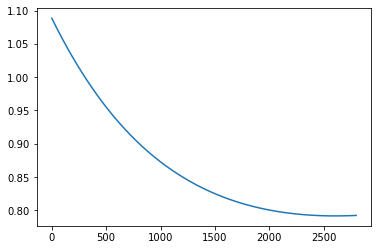

In [337]:
plt.plot(loss_b)
print(loss_b[-1])

In [410]:
initial_w = np.zeros((X_c_clean.shape[1],1))
w_c, loss_c = reg_logistic_regression(Y_c, X_c_clean, initial_w, 2800, 0.000000001,2)


1.3197316060699762


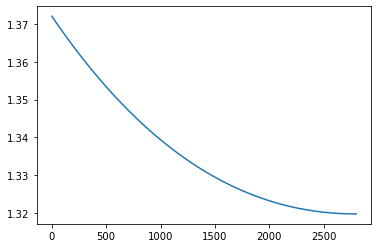

In [411]:
plt.plot(loss_c)
print(loss_c[-1])

In [369]:
DATA_TEST_PATH='./data/test.csv' 


Y_test, _X_test, ids_test= load_csv_data(DATA_TEST_PATH)

In [372]:
Y_test=Y_test.reshape((Y_test.shape[0],1))
ids_test=ids_test.reshape((ids_test.shape[0],1))

In [373]:
count=np.zeros(_X_test.shape[0])
for i in range(_X_test.shape[0]):
    count[i]=len([1 for j in _X_test[i,:] if j==-999])

X_test=np.c_[_X_test,count]

In [383]:
ids_test.shape

(568238, 1)

{0.0, 1.0, 7.0, 8.0, 10.0, 11.0}


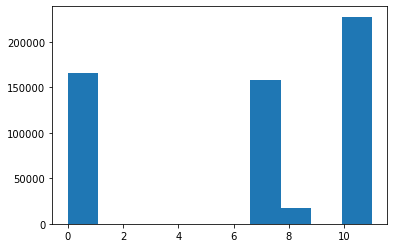

In [375]:
hst=plt.hist(count)
print(set(count))

In [390]:
X_test_a=X_test[np.asarray(X_test[:,-1]==0|(X_test[:,-1]==1))]
Y_test_a=Y_test[np.asarray(X_test[:,-1]==0|(X_test[:,-1]==1))]
ids_test_a=ids_test[np.asarray(X_test[:,-1]==0|(X_test[:,-1]==1))]

X_test_b=X_test[np.asarray((X_test[:,-1]==7)|(X_test[:,-1]==8))]
Y_test_b=Y_test[np.asarray((X_test[:,-1]==7)|(X_test[:,-1]==8))]
ids_test_b=ids_test[np.asarray((X_test[:,-1]==7)|(X_test[:,-1]==8))]

X_test_c=X_test[np.asarray((X_test[:,-1]==10)|(X_test[:,-1]==11))]
Y_test_c=Y_test[np.asarray((X_test[:,-1]==10)|(X_test[:,-1]==11))]
ids_test_c=ids_test[np.asarray(X_test[:,-1]==10|(X_test[:,-1]==11))]


In [391]:
print(Y_test_c.shape[0])
print(Y_test_b.shape[0])
print(Y_test_a.shape[0])

227458
175338
165442


In [392]:
print(ids_test_c.shape[0])
print(ids_test_b.shape[0])
print(ids_test_a.shape[0])

227458
175338
165442


In [393]:
print(X_test_c.shape[0])
print(X_test_b.shape[0])
print(X_test_a.shape[0])

227458
175338
165442


In [401]:
L_test_a=[i for i in range(X_test.shape[1]) if X_test_a[1,i]==-999]+[30]
L_test_b=[i for i in range(X_test.shape[1]) if X_test_b[0,i]==-999]+[30]
L_test_c=[i for i in range(X_test.shape[1]) if X_test_c[1,i]==-999]+[30]

In [402]:
X_test_a_clean=np.delete(X_test_a,L_test_a,1)
X_test_b_clean=np.delete(X_test_b,L_test_b,1)
X_test_c_clean=np.delete(X_test_c,L_test_c,1)

In [403]:
X_test_b_clean.shape

(175338, 23)

In [404]:
pred_a=predict_logistic_reg(w_a[-1],X_test_a_clean)
pred_b=predict_logistic_reg(w_b[-1],X_test_b_clean)
pred_c=predict_logistic_reg(w_c[-1],X_test_c_clean)

In [405]:
ids_test_final=np.concatenate((ids_test_a,ids_test_b,ids_test_c),axis=0)
pred_final=np.concatenate((pred_a,pred_b,pred_c),axis=0)

In [406]:
ids_test_final.shape

(568238, 1)

In [407]:
pred_final.shape

(568238, 1)

In [408]:
create_csv_submission(ids_test_final, pred_final, 'bkm')